In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/portofolios/student_scores.csv


R2 Score: 0.9678055545167993
MSE: 18.94321172231529

Koefisien model:
Hours: 24.2234


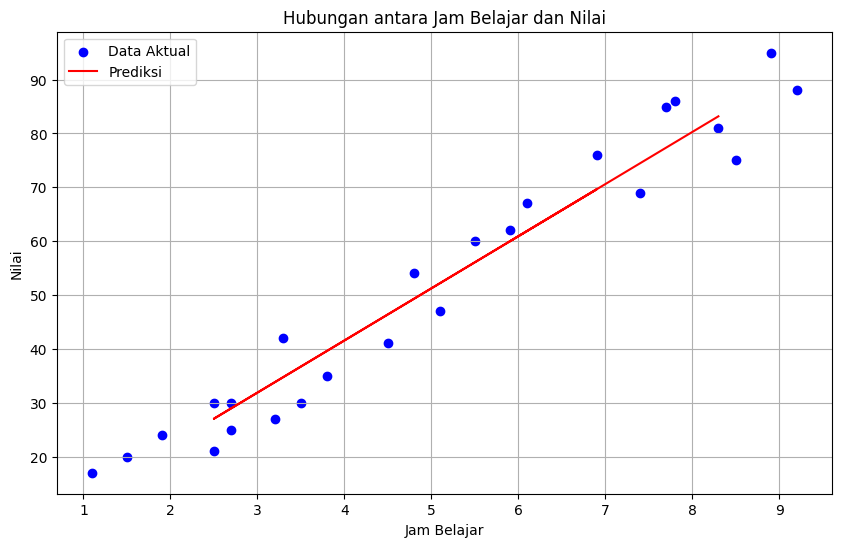


Jika siswa belajar 7.0 jam, nilai prediksinya adalah: 70.60


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.DataFrame([
    [2.5, 21], [5.1, 47], [3.2, 27], [8.5, 75], [3.5, 30],
    [1.5, 20], [9.2, 88], [5.5, 60], [8.3, 81], [2.7, 25],
    [7.7, 85], [5.9, 62], [4.5, 41], [3.3, 42], [1.1, 17],
    [8.9, 95], [2.5, 30], [1.9, 24], [6.1, 67], [7.4, 69],
    [2.7, 30], [4.8, 54], [3.8, 35], [6.9, 76], [7.8, 86]
], columns=['Hours', 'Scores'])

# Preprocessing
X = df[['Hours']]  # Feature
y = df['Scores']   # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluasi
y_pred = model.predict(X_test_scaled)
print('R2 Score:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

# Tampilkan koefisien model
print('\nKoefisien model:')
print(f'Hours: {model.coef_[0]:.4f}')

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.scatter(X['Hours'], y, color='blue', label='Data Aktual')
plt.plot(X_test['Hours'], y_pred, color='red', label='Prediksi')
plt.xlabel('Jam Belajar')
plt.ylabel('Nilai')
plt.title('Hubungan antara Jam Belajar dan Nilai')
plt.legend()
plt.grid(True)
plt.show()

# Contoh prediksi
jam_belajar = pd.DataFrame([[7.0]], columns=['Hours'])  # Perbaikan di sini
prediksi = model.predict(scaler.transform(jam_belajar))
print(f'\nJika siswa belajar {jam_belajar.iloc[0,0]} jam, nilai prediksinya adalah: {prediksi[0]:.2f}')

# Dataset Contribution: Student Performance Analysis

## Dataset Overview
- Source: Kaggle
- Domain: Education
- Features: Study hours, scores, etc.

## Data Insights
- Korelasi antara jam belajar dan skor
- Distribusi skor
- Faktor-faktor yang mempengaruhi performa siswa

## Preprocessing Steps
1. Handling missing values
2. Outlier detection
3. Feature scaling

# Linear Regression: Detailed Breakdown

## Konsep Dasar
- Memodelkan hubungan linear antara variabel independen dan dependen
- Menggunakan garis lurus untuk memprediksi

## Matematika di Balik Algoritma
- Persamaan: y = mx + b
- Cost Function: Mean Squared Error
- Gradient Descent untuk optimasi

## Kelebihan & Kekurangan
### Kelebihan
- Sederhana
- Interpretable
- Cepat dilatih

### Kekurangan
- Asumsi linear
- Sensitif terhadap outlier